In [121]:
%run ./PPS_Expansion_Model.ipynb

In [122]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

### Training parameters

In [123]:
stim_counts = 10
locav_x = 60

siga_x, sigv_x = 6.992e01, 2.889e00

HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=2.603e01,
    k2=7.795e02,
    lim=2.009e01,
    alpha=9.415e-01,
)

HCLt, HCLa, HCLv = Lw(
    Lex_t=0.15,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=0.15,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=0.15,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

## HC Training

In [124]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

HCWa_tr, HCWv_tr, zm, zv, za, zt = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'HC')

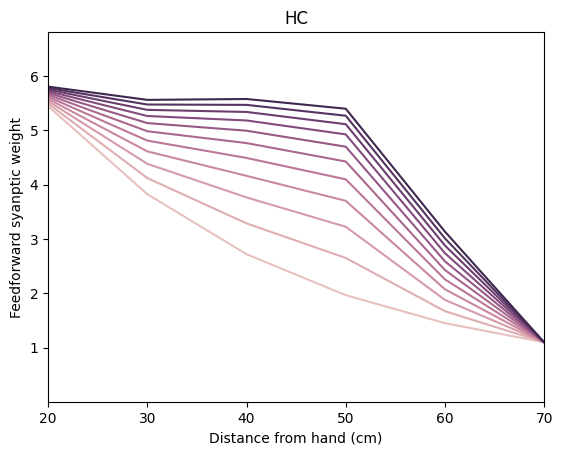

In [125]:
import seaborn as sns

hc_training_steps = np.column_stack((HCWa_tr[:, 1, :, 0], HCWa_tr[:, 1, -1, -1]))

sns.lineplot(
    hc_training_steps, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("HC")

## SCZ Training

In [126]:
Lex, Pr = 7.887e-01, 4.773e-01
SCZLt, SCZLa, SCZLv = Lw(
    Lex_t=Lex,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=Lex,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=Lex,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

In [127]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$')

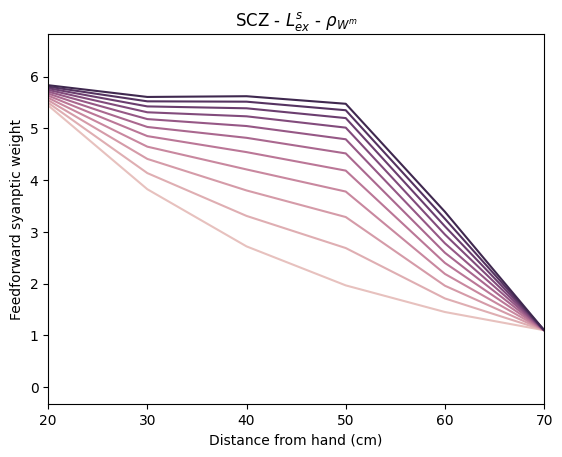

In [128]:
scz_training_steps = np.column_stack((SCZWa_tr[:, 1, :, 0], SCZWa_tr[:, 1, -1, -1]))

sns.lineplot(
    scz_training_steps, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$")

## SCZ Training - Reduced learning rate

In [129]:
rho_0 = 1.435e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

SCZWa_tr_rho, SCZWv_tr_rho, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$ - $\\rho^{s}_{0}$')

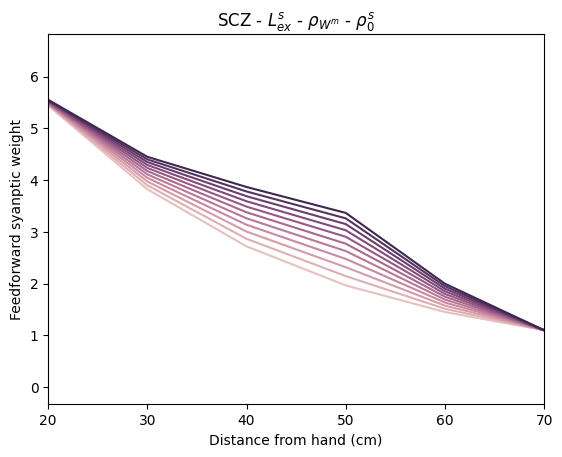

In [130]:
scz_training_steps_rho = np.column_stack(
    (SCZWa_tr_rho[:, 1, :, 0], SCZWa_tr_rho[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_rho, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$ - " + r"$\rho^{s}_{0}$")

## SCZ Training - Forgetting rate

In [131]:
rho_0 = 6.137e-02
k_a = 1.247e-03
k_v = 1.247e-03
theta_tr = 0.05

SCZWa_tr_kappa, SCZWv_tr_kappa, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{sm}}$ - $\\kappa^{s}$')

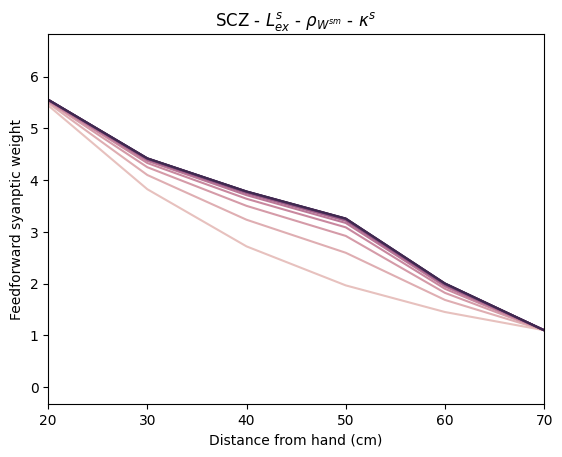

In [132]:
scz_training_steps_kappa = np.column_stack(
    (SCZWa_tr_kappa[:, 1, :, 0], SCZWa_tr_kappa[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_kappa,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{sm}}$ - " + r"$\kappa^{s}$")

## SCZ Training - Plasticity threshold

In [133]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 8.019e-01

SCZWa_tr_theta, SCZWv_tr_theta, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$ - $\\theta$')

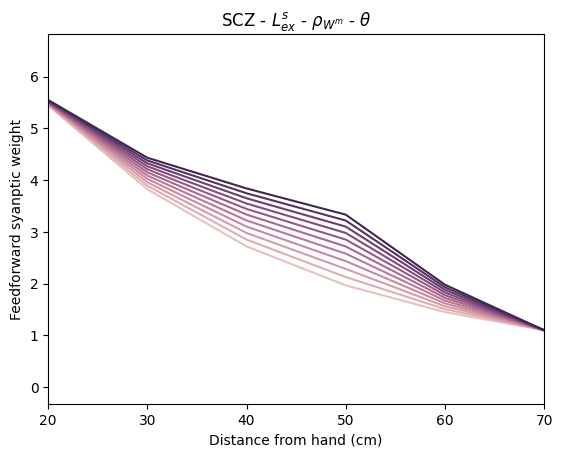

In [134]:
scz_training_steps_theta = np.column_stack(
    (SCZWa_tr_theta[:, 1, :, 0], SCZWa_tr_theta[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_theta,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$ - " + r"$\theta$")

## PPS expansion under different plasticity regimes

In [157]:
##Post-Training
###SCZ
ymin = 373.0
ymax = 455.0
scz_cp_post = 100 - 1.176 * v
scz_slope_post = 1 / 0.0615

SCZ_RTs_post = RTsig(a_distances, scz_cp_post, scz_slope_post)

##Post-Training
###HC
ymin = 271.5
ymax = 326.5
fpostHCCP = 100 - 0.920 * v
fpostHCS = 1 / 0.085

HC_RTs_post = RTsig(a_distances, fpostHCCP, fpostHCS)

In [158]:
HCWa_before_tr = np.expand_dims(HCWa_tr[:, :, 0, 0], axis=2)
hc_training_a_weights = np.concatenate((HCWa_before_tr, HCWa_tr[:, :, :, -1]), axis=2)

HCWv_before_tr = np.expand_dims(HCWv_tr[:, :, 0, 0], axis=2)
hc_training_v_weights = np.concatenate((HCWv_before_tr, HCWv_tr[:, :, :, -1]), axis=2)

steps = np.arange(0, 11)
cp_hc = []
slope_hc = []

for step in steps:
    _, _, _, _, HC_Model_RTs_post = experiment(
        ts=ts,
        T=simtime,
        dist=a_distances,
        ya=5,
        Lt=HCLt,
        La=HCLa,
        Lv=HCLv,
        Wt=HCWt,
        Wa=hc_training_a_weights[:, :, step],
        Wv=hc_training_v_weights[:, :, step],
        Bt=HCBt,
        Ba=HCBa,
        Bv=HCBv,
        Wat=HCWat,
        Wvt=HCWvt,
        Wav=HCWav,
        FWpr=0,
        CMpr=0,
    )

    HC_RTs_model_post_scaled = fit_RT(HC_Model_RTs_post, HC_RTs_post)
    ymin, ymax = np.min(HC_RTs_model_post_scaled), np.max(HC_RTs_model_post_scaled)
    HC_Lex_CP_model_post, HC_Lex_SLOPE_model_post = fitting(
        a_distances, HC_RTs_model_post_scaled
    )

    cp_hc.append(HC_Lex_CP_model_post)
    slope_hc.append(HC_Lex_SLOPE_model_post)

In [159]:
SCZWa_before_tr = np.expand_dims(SCZWa_tr[:, :, 0, 0], axis=2)
scz_training_a_weights = np.concatenate(
    (SCZWa_before_tr, SCZWa_tr[:, :, :, -1]), axis=2
)

SCZWv_before_tr = np.expand_dims(SCZWv_tr[:, :, 0, 0], axis=2)
scz_training_v_weights = np.concatenate(
    (SCZWv_before_tr, SCZWv_tr[:, :, :, -1]), axis=2
)

steps = np.arange(0, 11)
cp_scz = []
slope_scz = []

for step in steps:
    _, _, _, _, SCZ_Model_RTs_post = experiment(
        ts=ts,
        T=simtime,
        dist=a_distances,
        ya=5,
        Lt=SCZLt,
        La=SCZLa,
        Lv=SCZLv,
        Wt=HCWt,
        Wa=scz_training_a_weights[:, :, step],
        Wv=scz_training_v_weights[:, :, step],
        Bt=HCBt,
        Ba=HCBa,
        Bv=HCBv,
        Wat=HCWat,
        Wvt=HCWvt,
        Wav=HCWav,
        FWpr=0,
        CMpr=0,
    )

    SCZ_RTs_model_post_lex_scaled = fit_RT(SCZ_Model_RTs_post, SCZ_RTs_post)
    ymin, ymax = np.min(SCZ_RTs_model_post_lex_scaled), np.max(
        SCZ_RTs_model_post_lex_scaled
    )
    SCZ_Lex_CP_model_post, SCZ_Lex_SLOPE_model_post = fitting(
        a_distances, SCZ_RTs_model_post_lex_scaled
    )

    cp_scz.append(SCZ_Lex_CP_model_post)
    slope_scz.append(SCZ_Lex_SLOPE_model_post)

In [160]:
SCZWa_before_tr = np.expand_dims(SCZWa_tr_rho[:, :, 0, 0], axis=2)
scz_training_a_weights_rho = np.concatenate(
    (SCZWa_before_tr, SCZWa_tr_rho[:, :, :, -1]), axis=2
)

SCZWv_before_tr = np.expand_dims(SCZWv_tr_rho[:, :, 0, 0], axis=2)
scz_training_v_weights_rho = np.concatenate(
    (SCZWv_before_tr, SCZWv_tr_rho[:, :, :, -1]), axis=2
)

steps = np.arange(0, 11)
cp_rho = []
slope_rho = []

for step in steps:
    _, _, _, _, SCZ_Model_RTs_post = experiment(
        ts=ts,
        T=simtime,
        dist=a_distances,
        ya=5,
        Lt=SCZLt,
        La=SCZLa,
        Lv=SCZLv,
        Wt=HCWt,
        Wa=scz_training_a_weights_rho[:, :, step],
        Wv=scz_training_v_weights_rho[:, :, step],
        Bt=HCBt,
        Ba=HCBa,
        Bv=HCBv,
        Wat=HCWat,
        Wvt=HCWvt,
        Wav=HCWav,
        FWpr=0,
        CMpr=0,
    )

    SCZ_RTs_model_post_lex_scaled = fit_RT(SCZ_Model_RTs_post, SCZ_RTs_post)
    ymin, ymax = np.min(SCZ_RTs_model_post_lex_scaled), np.max(
        SCZ_RTs_model_post_lex_scaled
    )
    SCZ_Lex_CP_model_post, SCZ_Lex_SLOPE_model_post = fitting(
        a_distances, SCZ_RTs_model_post_lex_scaled
    )

    cp_rho.append(SCZ_Lex_CP_model_post)
    slope_rho.append(SCZ_Lex_SLOPE_model_post)

In [161]:
SCZWa_before_tr = np.expand_dims(SCZWa_tr_kappa[:, :, 0, 0], axis=2)
scz_training_a_weights_kappa = np.concatenate(
    (SCZWa_before_tr, SCZWa_tr_kappa[:, :, :, -1]), axis=2
)

SCZWv_before_tr = np.expand_dims(SCZWv_tr_kappa[:, :, 0, 0], axis=2)
scz_training_v_weights_kappa = np.concatenate(
    (SCZWv_before_tr, SCZWv_tr_kappa[:, :, :, -1]), axis=2
)

steps = np.arange(0, 11)
cp_kappa = []
slope_kappa = []

for step in steps:
    _, _, _, _, SCZ_Model_RTs_post = experiment(
        ts=ts,
        T=simtime,
        dist=a_distances,
        ya=5,
        Lt=SCZLt,
        La=SCZLa,
        Lv=SCZLv,
        Wt=HCWt,
        Wa=scz_training_a_weights_kappa[:, :, step],
        Wv=scz_training_v_weights_kappa[:, :, step],
        Bt=HCBt,
        Ba=HCBa,
        Bv=HCBv,
        Wat=HCWat,
        Wvt=HCWvt,
        Wav=HCWav,
        FWpr=0,
        CMpr=0,
    )

    SCZ_RTs_model_post_lex_scaled = fit_RT(SCZ_Model_RTs_post, SCZ_RTs_post)
    ymin, ymax = np.min(SCZ_RTs_model_post_lex_scaled), np.max(
        SCZ_RTs_model_post_lex_scaled
    )
    SCZ_Lex_CP_model_post, SCZ_Lex_SLOPE_model_post = fitting(
        a_distances, SCZ_RTs_model_post_lex_scaled
    )

    cp_kappa.append(SCZ_Lex_CP_model_post)
    slope_kappa.append(SCZ_Lex_SLOPE_model_post)

In [162]:
SCZWa_before_tr = np.expand_dims(SCZWa_tr_theta[:, :, 0, 0], axis=2)
scz_training_a_weights_theta = np.concatenate(
    (SCZWa_before_tr, SCZWa_tr_theta[:, :, :, -1]), axis=2
)

SCZWv_before_tr = np.expand_dims(SCZWv_tr_theta[:, :, 0, 0], axis=2)
scz_training_v_weights_theta = np.concatenate(
    (SCZWv_before_tr, SCZWv_tr_theta[:, :, :, -1]), axis=2
)

steps = np.arange(0, 11)
cp_theta = []
slope_theta = []

for step in steps:
    _, _, _, _, SCZ_Model_RTs_post = experiment(
        ts=ts,
        T=simtime,
        dist=a_distances,
        ya=5,
        Lt=SCZLt,
        La=SCZLa,
        Lv=SCZLv,
        Wt=HCWt,
        Wa=scz_training_a_weights_theta[:, :, step],
        Wv=scz_training_v_weights_theta[:, :, step],
        Bt=HCBt,
        Ba=HCBa,
        Bv=HCBv,
        Wat=HCWat,
        Wvt=HCWvt,
        Wav=HCWav,
        FWpr=0,
        CMpr=0,
    )

    SCZ_RTs_model_post_lex_scaled = fit_RT(SCZ_Model_RTs_post, SCZ_RTs_post)
    ymin, ymax = np.min(SCZ_RTs_model_post_lex_scaled), np.max(
        SCZ_RTs_model_post_lex_scaled
    )
    SCZ_Lex_CP_model_post, SCZ_Lex_SLOPE_model_post = fitting(
        a_distances, SCZ_RTs_model_post_lex_scaled
    )

    cp_theta.append(SCZ_Lex_CP_model_post)
    slope_theta.append(SCZ_Lex_SLOPE_model_post)

## Figure 4

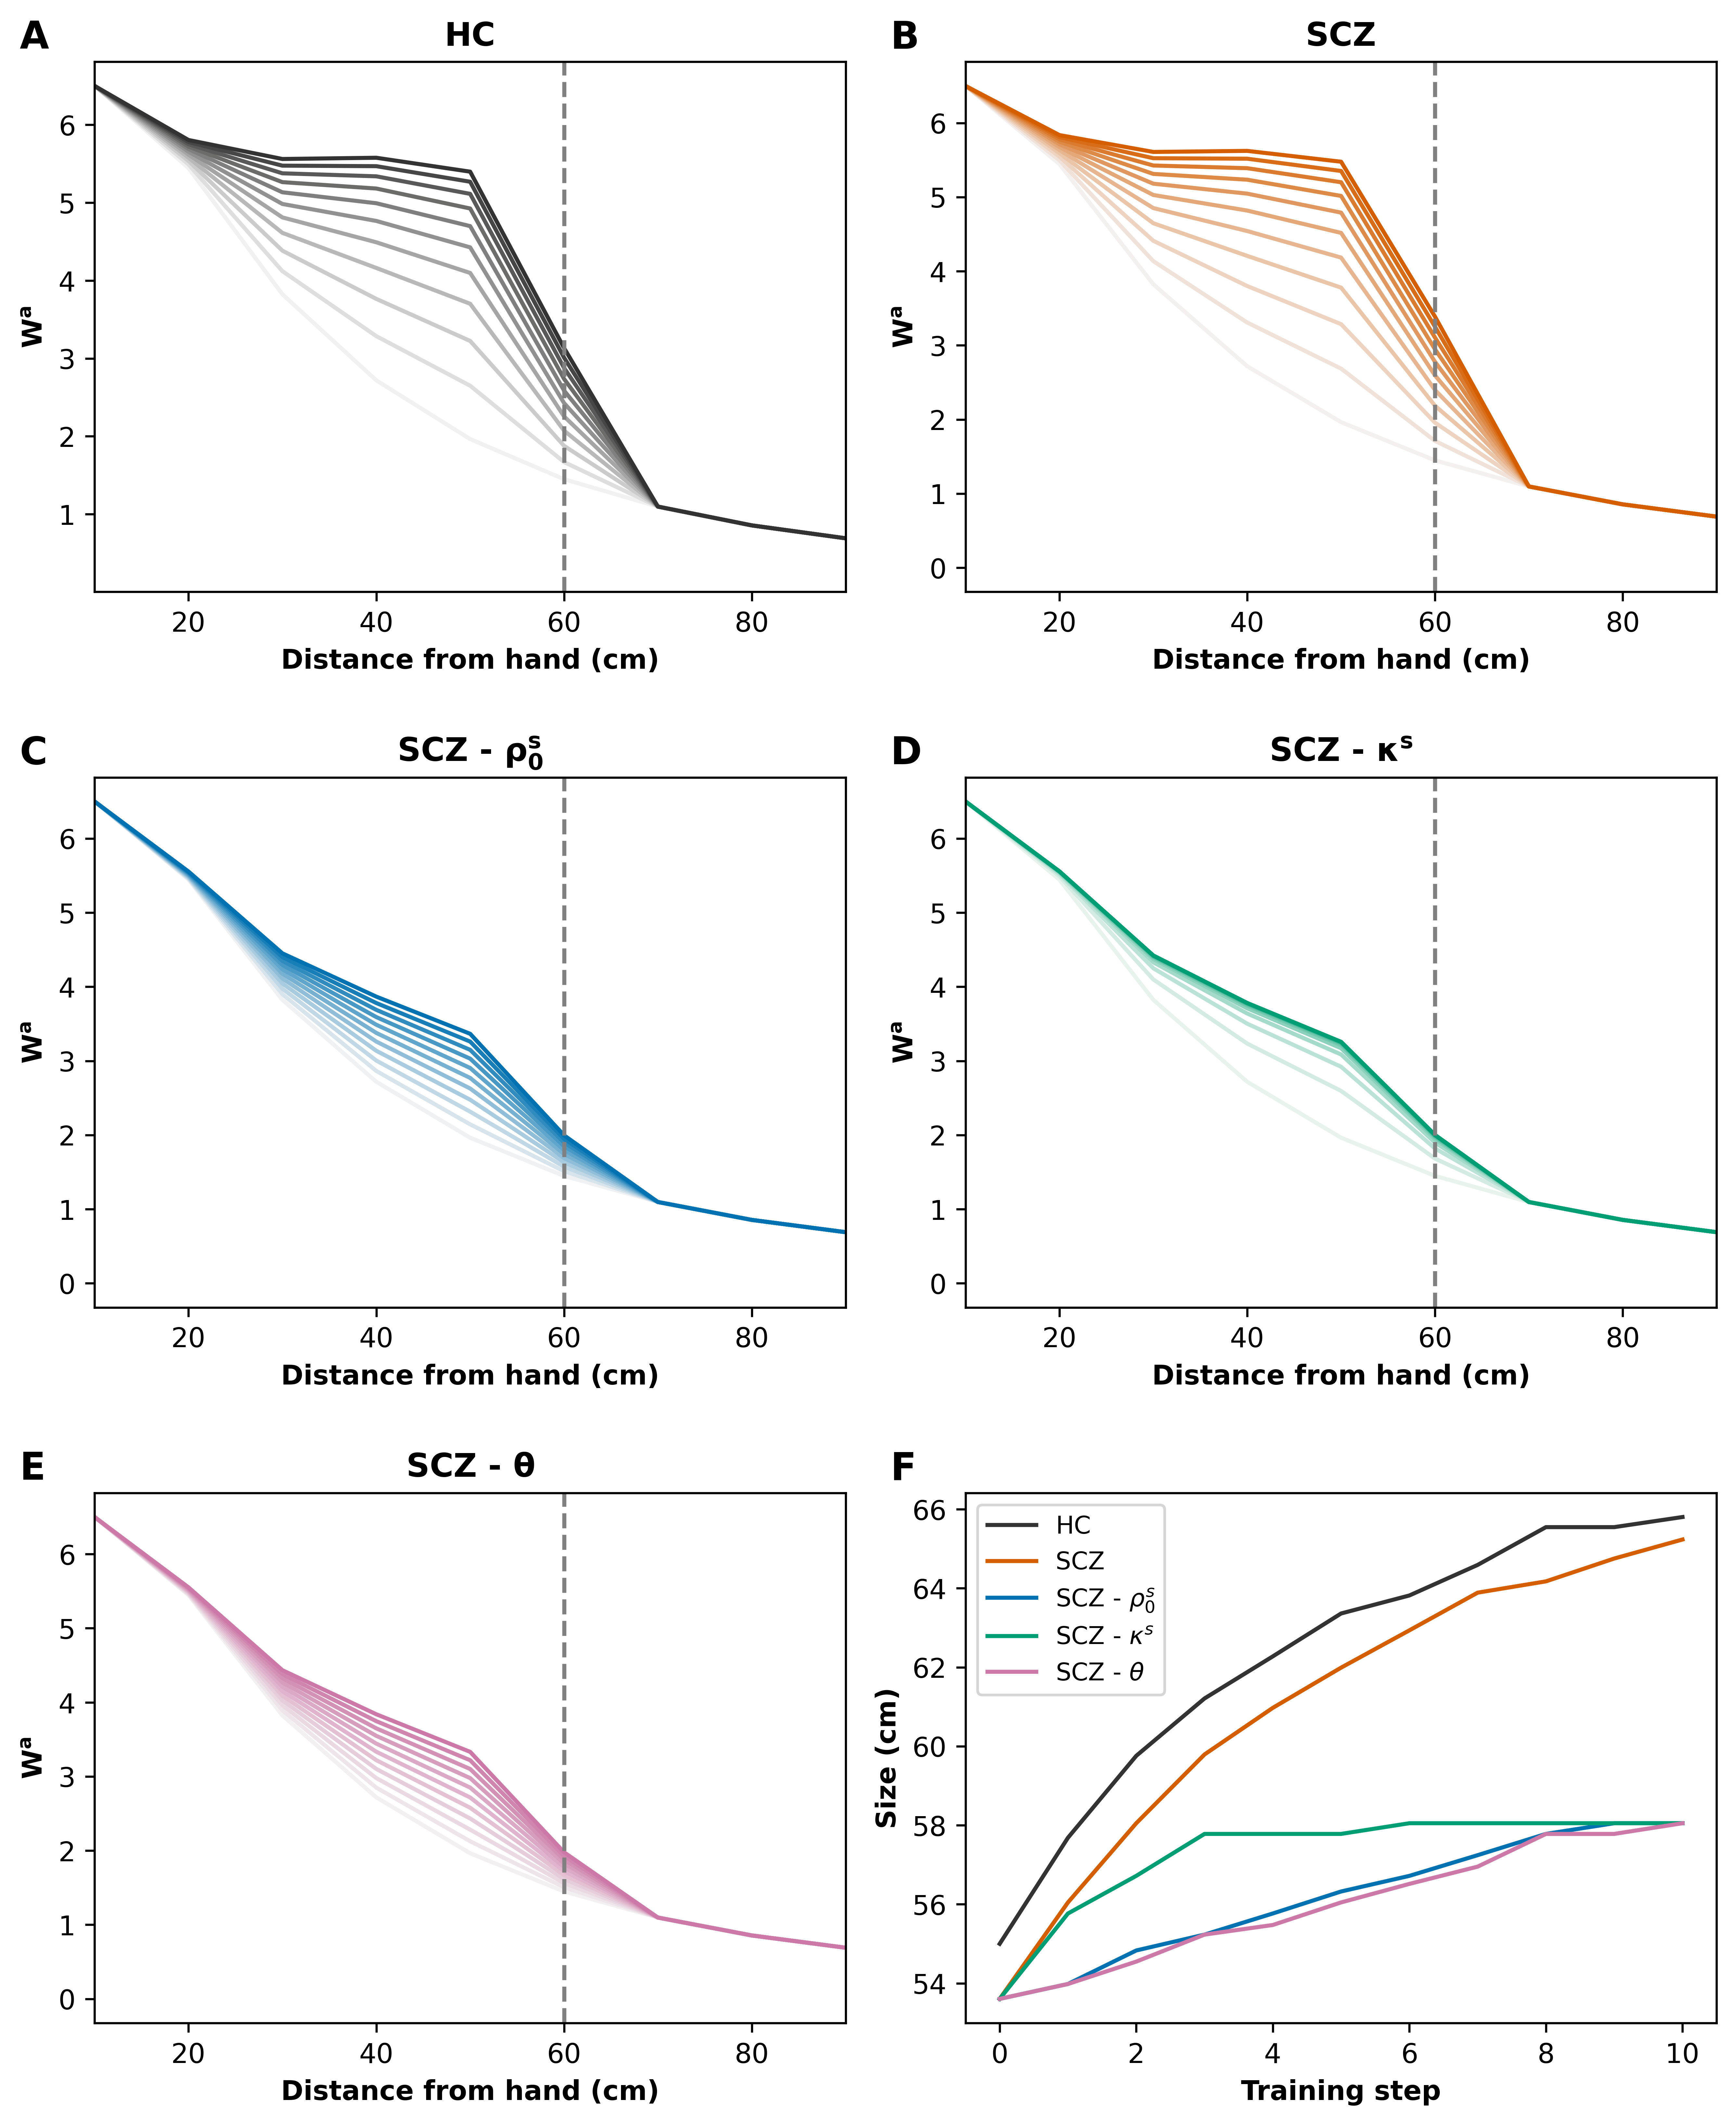

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [205]:
# Define the base colors
colors = [
    "#333333",  # HC: Dark Grey (Neutral / Baseline) '#DDAA33' Dark Yellow/Gold (Readable on white)
    "#D55E00",  # SCZ: Vermilion (High contrast, warm)
    "#0072B2",  # SCZ Rho: Blue (Strong contrast to Vermilion)
    "#009E73",  # SCZ Kappa: Bluish Green (Distinct from Blue)
    "#CC79A7",  # SCZ Theta: Reddish Purple (Distinct from all above)
]

# Create a figure
fig, axs = plt.subplots(3, 2, figsize=(9, 11), dpi=600)

# --- Panel 1: HC ---
ax1 = plt.subplot(321)
# Create gradient palette: Light Blue -> Dark Blue
# n_colors must match the number of lines (columns) in your data
n_lines = hc_training_steps.shape[1]
pal_hc = sns.light_palette(colors[0], n_colors=n_lines)

sns.lineplot(
    data=hc_training_steps,
    palette=pal_hc,
    dashes=False,
    legend=False,
    ax=ax1,
)
ax1.set_title("HC", fontweight="bold")

# --- Panel 2: SCZ ---
ax2 = plt.subplot(322)
n_lines = scz_training_steps.shape[1]
pal_scz = sns.light_palette(colors[1], n_colors=n_lines)

sns.lineplot(
    data=scz_training_steps,
    palette=pal_scz,
    dashes=False,
    legend=False,
    ax=ax2,
)
ax2.set_title("SCZ", fontweight="bold")

# --- Panel 3: SCZ Rho ---
ax3 = plt.subplot(323)
n_lines = scz_training_steps_rho.shape[1]
pal_rho = sns.light_palette(colors[2], n_colors=n_lines)

sns.lineplot(
    data=scz_training_steps_rho,
    palette=pal_rho,
    dashes=False,
    legend=False,
    ax=ax3,
)
ax3.set_title(
    "SCZ - " + r"$\mathbf{\rho^{s}_{0}}$",
    fontweight="bold",
)

# --- Panel 4: SCZ Kappa ---
ax4 = plt.subplot(324)
n_lines = scz_training_steps_kappa.shape[1]
pal_kappa = sns.light_palette(colors[3], n_colors=n_lines)

sns.lineplot(
    data=scz_training_steps_kappa,
    palette=pal_kappa,
    dashes=False,
    legend=False,
    ax=ax4,
)
ax4.set_title(
    "SCZ - " + r"$\mathbf{\kappa^{s}}$",
    fontweight="bold",
)

# --- Panel 5: SCZ Theta ---
ax5 = plt.subplot(325)
n_lines = scz_training_steps_theta.shape[1]
pal_theta = sns.light_palette(colors[4], n_colors=n_lines)

sns.lineplot(
    data=scz_training_steps_theta,
    palette=pal_theta,
    dashes=False,
    legend=False,
    ax=ax5,
)
ax5.set_title(
    "SCZ - " + r"$\mathbf{\theta}$",
    fontweight="bold",
)

# --- Common Formatting ---
count = 0
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlim(1, 9)
    ax.set_xticks(ticks=[2, 4, 6, 8], labels=[20, 40, 60, 80])
    ax.set_xlabel("Distance from hand (cm)", fontweight="bold")
    ax.set_ylabel(r"$\mathbf{W^{a}}$", fontweight="bold")
    # Assuming locav_x is defined in your environment
    ax.axvline(x=locav_x * 0.1, color="gray", linestyle="--")
    ax.text(
        -0.1,
        1.025,
        string.ascii_uppercase[count],
        transform=ax.transAxes,
        size=14,
        weight="bold",
    )
    count = count + 1

# --- Panel 6: Summary ---
ax6 = plt.subplot(326)
ax6.plot(steps, cp_hc, label="HC", color=colors[0])  # Blue
ax6.plot(steps, cp_scz, label="SCZ", color=colors[1])  # Orange
ax6.plot(steps, cp_rho, label="SCZ - " + r"$\rho^{s}_{0}$", color=colors[2])  # Green
ax6.plot(steps, cp_kappa, label="SCZ - " + r"$\kappa^{s}$", color=colors[3])  # Red
ax6.plot(steps, cp_theta, label="SCZ - " + r"$\theta$", color=colors[4])  # Purple

ax6.set_xlabel("Training step", weight="bold")
ax6.set_ylabel("Size (cm)", weight="bold")
ax6.text(
    -0.1,
    1.025,
    string.ascii_uppercase[5],
    transform=ax6.transAxes,
    size=14,
    weight="bold",
)
ax6.legend(fontsize=9)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(hspace=0.35)
plt.show()

fig.savefig("drafts/FIG4.eps", bbox_inches="tight", format="eps")